##### Detectando Doença de Parkinson
## Uma Comparação de Modelos de Aprendizagem de Máquina

---


## Problemática
A doença de Parkinson (DP) é um distúrbio neurodegenerativo progressivo caracterizado por um grande número de características motoras e não motoras. A DP é a segunda doença neurodegenerativa mais comum após Alzheimer, observada em pessoas acima de 60 anos.

Visto que aproximadamente **90% dos pacientes com DP** exibem algum tipo de distúrbio vocal nos estágios iniciais da doença, o presente notebook possui o objetivo de **comparar modelos que possam classificar se determinada coleta de exame médico é de um paciente com Doença de Parkinson ou não**, consistindo **ao todo em 756 registros de coletas**, sendo 564 coletas atribuídas a 188 pacientes com Doença de Parkinson e 192 coletas refrentes a 64 pacientes saudáveis.

Aqui utilizaremos os seguintes algoritmos de aprendizagem de máquina para compará-los entre si:
> - Regressão Logística
> - Análise de Discriminante Gaussiano
> - Árvore de Decisão
> - SVM
> - Random Forest
> - KNN
> - Processo Gaussiano


## Fonte dos Dados
O dataset utilizado para este problema foi retirado do [Kaggle]( https://www.kaggle.com/dipayanbiswas/parkinsons-disease-speech-signal-features), fruto de uma coleta de exames ralizados no Departamento de Neurologia da Faculdade de Medicina de Cerrahpaşa, Universidade de Istambu, consiste em **756 coletas de exames médicos**, sendo três coletas para cada paciente, destes **188 possuem a Doença de Parkinson** e **84 saudáveis** totalizando exames de 252 pacientes.

## Sumário
#### 1. Importações
#### 2. Leitura dos Dados
#### 3. Redução de Dimensionalidade dos Dados
#### 4. Avaliação dos Modelos

# 1. Importações

In [1]:
import numpy as np
import pandas as pd
import warnings
import random
import seaborn as sb
import matplotlib.pyplot as plt
from statistics import mean
from math import log, pi, sqrt
%matplotlib inline

from scipy.linalg import svd 
from sklearn import linear_model, datasets, svm, metrics
import scipy.linalg as la
from scipy.stats import norm
from scipy.stats import multivariate_normal
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, auc
from mlxtend.plotting import plot_confusion_matrix

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import DistanceMetric, KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF, Matern, RationalQuadratic, ExpSineSquared
from modelos import distance_euclidian, distance_manhattan, fitAD, fitAGD, fitRF, fitRL, fitSVM, predict1AGD, predict1KNN, predictAD, predictAGD, predictKNN, predictRF, predictRL, predictSVM, sigmoide, fitGP, predictGP, train_testSplit 
warnings.filterwarnings("ignore")
np.random.seed(12345)

In C:\Users\edvar.filho\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\edvar.filho\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\edvar.filho\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\edvar.filho\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be remove

# 2. Leitura dos Dados

In [2]:
dataset = pd.read_csv("data.csv")
header = dataset.loc[0]
dataset = dataset.drop([0])
dataset.columns = header
dataset.index = range(0, dataset.shape[0])
for col in dataset.columns:
    dataset[col] = dataset[col].astype(float)
data = dataset
data.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0.0,1.0,0.85247,0.71826,0.57227,240.0,239.0,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1.0
1,0.0,1.0,0.76686,0.69481,0.53966,234.0,233.0,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1.0
2,0.0,1.0,0.85083,0.67604,0.58982,232.0,231.0,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1.0
3,1.0,0.0,0.41121,0.79672,0.59257,178.0,177.0,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1.0
4,1.0,0.0,0.32790,0.79782,0.53028,236.0,235.0,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1.0


## 2.1. Normalização dos Dados

In [3]:
def normalizacaoZScore(x):
    mean = np.mean(x, axis = 0)
    xIntermed = x - mean
    sd = np.std(x, axis = 0)
    xFinal = xIntermed / sd
    return xFinal

In [4]:
x = normalizacaoZScore(data.values[:,1:-1])

# 3. Redução da Dimensionalidade

## 3.1. PCA

In [5]:
def compute(x):
    mean = np.mean(x, axis = 0)
    cov = np.cov(np.transpose(x))
    U, S, V = svd(cov)
    S = np.diag(S)
    M = U @ S @ V
    P = np.transpose(U)
    
    return {'S': S, 'U': U, 'V': V, 'M': M, 'P': P}

def transform(x, k):
    pca_result = compute(x)
    S = pca_result['S']
    P = pca_result['P']
    matrizTransform = []
    autoValores = []
    for i in range(0, S.shape[0]):
        autoValores.append(S[i,i])
    autoValOrdenados = np.sort(autoValores)
    autoValOrdenados = autoValOrdenados[::-1]
    for i in range(0, k):
        for j in range (0, len(autoValores)):
            if(autoValOrdenados[i]==autoValores[j]):
                matrizTransform.append(P[j])
                
    return {'P': matrizTransform, 'Z':np.transpose(np.dot(matrizTransform, np.transpose(x)))}

In [6]:
resultPCA = transform(x, 100)

In [7]:
dataPCA = np.hstack((resultPCA['Z'], data.values[:,-1][:,None]))
dataPCA = np.hstack((data.values[:,0][:,None], dataPCA))
matrizPCA = resultPCA['P']

In [8]:
dataPCA = pd.DataFrame(dataPCA)
dataPCA = dataPCA.rename(columns={0: 'id'})

## 3.2. Mod-SULQ

In [9]:
def mod_sulq(X, epsilon, delta, k):
    matrizX = np.transpose(X)
    matrizA = 1/matrizX.shape[1] * np.dot(matrizX, np.transpose(matrizX))
    fator1Beta = (matrizX.shape[0] + 1)/(matrizX.shape[1] * epsilon)
    fator2Beta = (matrizX.shape[0]**2 + matrizX.shape[0])/(delta * 2 * sqrt(2 * pi))
    fator3Beta = 1 / (sqrt(epsilon) * matrizX.shape[1])
    beta = fator1Beta * sqrt(2 * np.log(fator2Beta)) + fator3Beta
    matrizRuido = norm.rvs(loc = 0, scale = beta**2, size = (matrizX.shape[0], matrizX.shape[0]))
    matrizX = matrizRuido + matrizA
    matrizTransform = []
    autoValores, autoVetores = la.eig(matrizX)
    autoValores = autoValores.real
    autoValOrdenados = np.sort(np.unique(autoValores))
    autoValoresEscolhidos = []
    for i in range(0, k):
        for j in range (0, len(autoValores)):
            if(autoValOrdenados[i]==autoValores[j] and autoValOrdenados[i] not in autoValoresEscolhidos):
                autoValoresEscolhidos.append(autoValOrdenados[i])
                matrizTransform.append(autoVetores[j])
    return {'P': matrizTransform, 'Z':np.transpose(np.dot(matrizTransform, np.transpose(X)))}

In [10]:
resultModSULQ = mod_sulq(x, 1, 1, 100)

In [11]:
dataModSULQ = np.hstack((resultModSULQ['Z'], data.values[:,-1][:,None]))
dataModSULQ = np.hstack((data.values[:,0][:,None], dataModSULQ))
matrizModSULQ = resultModSULQ['P']

In [12]:
dataModSULQ = pd.DataFrame(dataModSULQ)
dataModSULQ = dataModSULQ.rename(columns={0: 'id'})
for col in dataModSULQ.columns:
    dataModSULQ[col] = dataModSULQ[col].astype(float)

# 4. Avaliação de Métodos

In [13]:
def acc(y_test, results):
    tot = [1 for x,z in zip(y_test,results) if x == z]
    return (np.sum(np.array(tot))/len(y_test))*100

In [14]:
ids = dataPCA['id'].unique()
trainTestPCA, trainTestModSULQ = train_testSplit(ids, dataPCA, dataModSULQ, 0.25)

## 4.1. Abordagem Não-Privada

In [15]:
x_train, x_test, y_train, y_test = trainTestPCA[0], trainTestPCA[1], trainTestPCA[2], trainTestPCA[3]
yTestNpriv = y_test

### 4.1.1. Regressão Logística

In [16]:
w, erroRL = fitRL(x_train, y_train)
y_predRL, y_prevRL = predictRL(w, x_test)
print("[Regressão Logística] Score")
acc(y_test, y_predRL)

[Regressão Logística] Selecionando hiperparâmetros...
[Regressão Logística] Treinando modelo...
[Regressão Logística] Hiperparâmetros escolhidos para Regressão Logística: {'n_epochs': 1000, 'alpha': 0.1, 'lambda': 0.01}
[Regressão Logística] Testando modelo...
[Regressão Logística] Score


67.72486772486772

In [17]:
print(classification_report(y_test, y_predRL))

              precision    recall  f1-score   support

         0.0       0.42      0.73      0.53        48
         1.0       0.88      0.66      0.75       141

    accuracy                           0.68       189
   macro avg       0.65      0.69      0.64       189
weighted avg       0.76      0.68      0.70       189



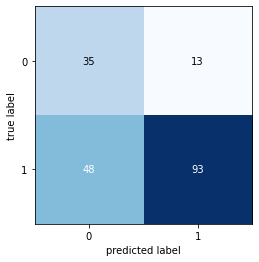

In [18]:
cm = confusion_matrix(y_test, y_predRL)

fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.savefig('graficos/RegLog.png')
plt.show()

### 4.1.2. Análise Discriminante Gaussiano

In [19]:
y_predAGD, y_prevAGD = predictAGD(fitAGD(x_train, y_train), x_test)
print("[Análise de Discriminante Gaussiano] Score")
acc(y_test, y_predAGD)

[Análise de Discriminante Gaussiano] Treinando modelo...
[Análise de Discriminante Gaussiano] Testando modelo...
[Análise de Discriminante Gaussiano] Score


76.19047619047619

In [20]:
print(classification_report(y_test, y_predAGD))

              precision    recall  f1-score   support

         0.0       0.62      0.17      0.26        48
         1.0       0.77      0.96      0.86       141

    accuracy                           0.76       189
   macro avg       0.69      0.57      0.56       189
weighted avg       0.73      0.76      0.71       189



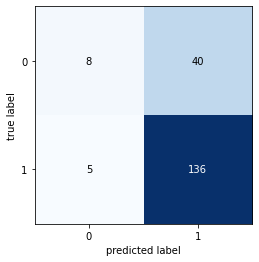

In [21]:
cm = confusion_matrix(y_test, y_predAGD)

fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.savefig('graficos/AGD.png')
plt.show()

### 4.1.3. Árvore de Decisão

In [22]:
y_predAD, y_prevAD = predictAD(fitAD(x_train, y_train), x_train, y_train, x_test)
print("[Árvore de Decisão] Score")
acc(y_test, y_predAD)

[Árvore de Decisão] Selecionando hiperparâmetros...
[Árvore de Decisão] Treinando modelo...
[Árvore de Decisão] Hiperparâmetros escolhidos para Árvore de Decisão:  {'criterion': 'entropy', 'max_depth': 1}
[Árvore de Decisão] Testando modelo...
[Árvore de Decisão] Score


75.66137566137566

In [23]:
print(classification_report(y_test, y_predAD))

              precision    recall  f1-score   support

         0.0       0.53      0.35      0.42        48
         1.0       0.80      0.89      0.85       141

    accuracy                           0.76       189
   macro avg       0.67      0.62      0.64       189
weighted avg       0.73      0.76      0.74       189



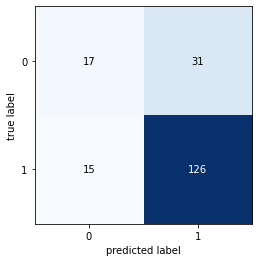

In [24]:
cm = confusion_matrix(y_test, y_predAD)

fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.savefig('graficos/AD.png')
plt.show()

### 4.1.4. SVM

In [25]:
y_predSVM, y_prevSVM = predictSVM(fitSVM(x_train, y_train), x_train, y_train, x_test)
print("[SVM] Score")
acc(y_test,y_predSVM)

[SVM] Selecionando hiperparâmetros...
[SVM] Treinando modelo...
[SVM] Hiperparâmetros escolhidos para SVM:  {'C': 0.125, 'degree': 3, 'kernel': 'poly'}
[SVM] Testando modelo...
[SVM] Score


79.8941798941799

In [26]:
print(classification_report(y_test, y_predSVM))

              precision    recall  f1-score   support

         0.0       0.69      0.38      0.49        48
         1.0       0.82      0.94      0.87       141

    accuracy                           0.80       189
   macro avg       0.75      0.66      0.68       189
weighted avg       0.78      0.80      0.78       189



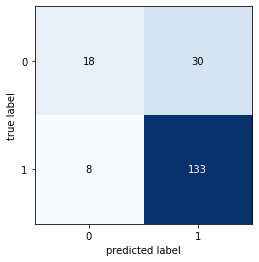

In [27]:
cm = confusion_matrix(y_test, y_predSVM)

fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.savefig('graficos/SVM.png')
plt.show()

### 4.1.5. Random Forest

In [28]:
y_predRF, y_prevRF = predictRF(fitRF(x_train, y_train), x_train, y_train, x_test)
print("[Random Forest] Score")
acc(y_test, y_predRF)

[Random Forest] Selecionando hiperparâmetros...
[Random Forest] Treinando modelo...
[Random Forest] Hiperparâmetros escolhidos para Radom Forest:  {'criterion': 'gini', 'max_depth': 9, 'n_estimators': 146}
[Random Forest] Testando modelo...
[Random Forest] Score


79.8941798941799

In [29]:
print(classification_report(y_test, y_predRF))

              precision    recall  f1-score   support

         0.0       0.81      0.27      0.41        48
         1.0       0.80      0.98      0.88       141

    accuracy                           0.80       189
   macro avg       0.81      0.62      0.64       189
weighted avg       0.80      0.80      0.76       189



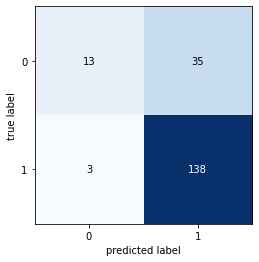

In [30]:
cm = confusion_matrix(y_test, y_predRF)

fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.savefig('graficos/RF.png')
plt.show()

### 4.1.6. KNN

In [31]:
y_predKNN = predictKNN(x_train, y_train, x_test, distance_euclidian)
print("[KNN] Score")
print(acc(y_test, y_predKNN))

[KNN] Treinando modelo...
[KNN] Hiperparâmetros escolhidos para KNN:  {'n_neighbors': 9}
[KNN] Testando modelo...
[KNN] Score
79.36507936507937


In [32]:
print(classification_report(y_test, y_predKNN))

              precision    recall  f1-score   support

         0.0       0.74      0.29      0.42        48
         1.0       0.80      0.96      0.87       141

    accuracy                           0.79       189
   macro avg       0.77      0.63      0.65       189
weighted avg       0.78      0.79      0.76       189



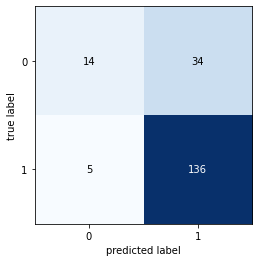

In [33]:
cm = confusion_matrix(y_test, y_predKNN)

fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.savefig('graficos/KNN.png')
plt.show()

### 4.1.7. Processo Gaussiano

In [34]:
y_predGP, y_prevGP = predictGP(fitGP(x_train, y_train), x_train, y_train, x_test)
print("[Processo Gaussiano] Score")
print(acc(y_test, y_predGP))

[Processo Gaussiano] Selecionando kernel...
[Processo Gaussiano] Treinando modelo...
[Processo Gaussiano] Kernel escolhidos para Processo Gaussiano:  {'kernel': RationalQuadratic(alpha=1.5, length_scale=1)}
[Processo Gaussiano] Testando modelo...
[Processo Gaussiano] Score
81.48148148148148


In [35]:
print(classification_report(y_test, y_predGP))

              precision    recall  f1-score   support

         0.0       0.84      0.33      0.48        48
         1.0       0.81      0.98      0.89       141

    accuracy                           0.81       189
   macro avg       0.83      0.66      0.68       189
weighted avg       0.82      0.81      0.78       189



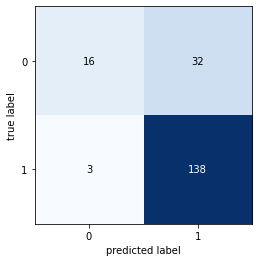

In [36]:
cm = confusion_matrix(y_test, y_predGP)

fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.savefig('graficos/GP.png')
plt.show()

## 4.2. Abordagem Privada

In [37]:
x_train, x_test, y_train, y_test = trainTestModSULQ[0], trainTestModSULQ[1], trainTestModSULQ[2], trainTestModSULQ[3]

### 4.2.1. Regressão Logística

In [38]:
w, erroRLP = fitRL(x_train, y_train)
y_predRLP, y_prevRLP = predictRL(w, x_test)
print("[Regressão Logística] Score")
acc(y_test, y_predRLP)

[Regressão Logística] Selecionando hiperparâmetros...
[Regressão Logística] Treinando modelo...
[Regressão Logística] Hiperparâmetros escolhidos para Regressão Logística: {'n_epochs': 10000, 'alpha': 0.1, 'lambda': 0.01}
[Regressão Logística] Testando modelo...
[Regressão Logística] Score


67.1957671957672

In [39]:
print(classification_report(y_test, y_predRLP))

              precision    recall  f1-score   support

         0.0       0.41      0.71      0.52        48
         1.0       0.87      0.66      0.75       141

    accuracy                           0.67       189
   macro avg       0.64      0.68      0.64       189
weighted avg       0.75      0.67      0.69       189



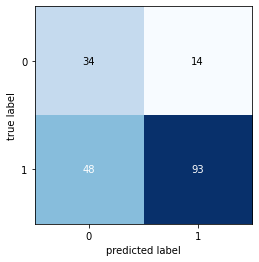

In [40]:
cm = confusion_matrix(y_test, y_predRLP)

fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.savefig('graficos/RegLogPriv.png')
plt.show()

### 4.2.2. Análise de Discriminante Gaussiano

In [41]:
y_predAGDP, y_prevAGDP = predictAGD(fitAGD(x_train, y_train), x_test)
print("[Análise de Discriminante Gaussiano] Score")
acc(y_test, y_predAGDP)

[Análise de Discriminante Gaussiano] Treinando modelo...
[Análise de Discriminante Gaussiano] Testando modelo...
[Análise de Discriminante Gaussiano] Score


75.13227513227513

In [42]:
print(classification_report(y_test, y_predAGDP))

              precision    recall  f1-score   support

         0.0       0.57      0.08      0.15        48
         1.0       0.76      0.98      0.85       141

    accuracy                           0.75       189
   macro avg       0.66      0.53      0.50       189
weighted avg       0.71      0.75      0.67       189



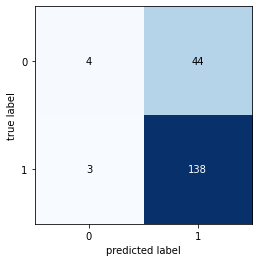

In [43]:
cm = confusion_matrix(y_test, y_predAGDP)

fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.savefig('graficos/AGDPriv.png')
plt.show()

### 4.2.3. Árvore de Decisão

In [44]:
y_predADP, y_prevADP = predictAD(fitAD(x_train, y_train), x_train, y_train, x_test)
print("[Árvore de Decisão] Score")
acc(y_test, y_predADP)

[Árvore de Decisão] Selecionando hiperparâmetros...
[Árvore de Decisão] Treinando modelo...
[Árvore de Decisão] Hiperparâmetros escolhidos para Árvore de Decisão:  {'criterion': 'gini', 'max_depth': 5}
[Árvore de Decisão] Testando modelo...
[Árvore de Decisão] Score


74.60317460317461

In [45]:
print(classification_report(y_test, y_predADP))

              precision    recall  f1-score   support

         0.0       0.50      0.42      0.45        48
         1.0       0.81      0.86      0.83       141

    accuracy                           0.75       189
   macro avg       0.66      0.64      0.64       189
weighted avg       0.73      0.75      0.74       189



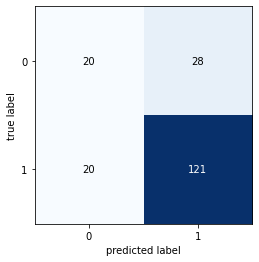

In [46]:
cm = confusion_matrix(y_test, y_predADP)

fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.savefig('graficos/ADPriv.png')
plt.show()

### 4.2.4. SVM

In [47]:
y_predSVMP, y_prevSVMP = predictSVM(fitSVM(x_train, y_train), x_train, y_train, x_test)
print("[SVM] Score")
acc(y_test,y_predSVMP)

[SVM] Selecionando hiperparâmetros...
[SVM] Treinando modelo...
[SVM] Hiperparâmetros escolhidos para SVM:  {'C': 4.0, 'degree': 3, 'kernel': 'poly'}
[SVM] Testando modelo...
[SVM] Score


79.36507936507937

In [48]:
print(classification_report(y_test, y_predSVMP))

              precision    recall  f1-score   support

         0.0       0.76      0.27      0.40        48
         1.0       0.80      0.97      0.88       141

    accuracy                           0.79       189
   macro avg       0.78      0.62      0.64       189
weighted avg       0.79      0.79      0.75       189



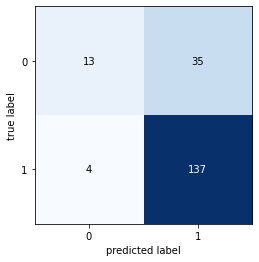

In [49]:
cm = confusion_matrix(y_test, y_predSVMP)

fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.savefig('graficos/SVMPriv.png')
plt.show()

### 4.2.5. Random Forest

In [50]:
y_predRFP, y_prevRFP = predictRF(fitRF(x_train, y_train), x_train, y_train, x_test)
print("[Random Forest] Score")
acc(y_test, y_predRFP)

[Random Forest] Selecionando hiperparâmetros...
[Random Forest] Treinando modelo...
[Random Forest] Hiperparâmetros escolhidos para Radom Forest:  {'criterion': 'gini', 'max_depth': 8, 'n_estimators': 137}
[Random Forest] Testando modelo...
[Random Forest] Score


81.48148148148148

In [51]:
print(classification_report(y_test, y_predRFP))

              precision    recall  f1-score   support

         0.0       0.81      0.35      0.49        48
         1.0       0.82      0.97      0.89       141

    accuracy                           0.81       189
   macro avg       0.81      0.66      0.69       189
weighted avg       0.81      0.81      0.79       189



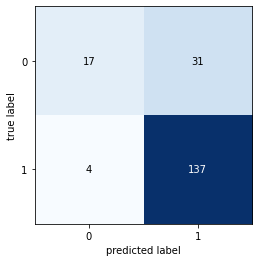

In [52]:
cm = confusion_matrix(y_test, y_predRFP)

fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.savefig('graficos/RFPriv.png')
plt.show()

### 4.2.6. KNN

In [53]:
y_predKNNP = predictKNN(x_train, y_train, x_test, distance_euclidian)
print("[KNN] Score")
print(acc(y_test, y_predKNNP))

[KNN] Treinando modelo...
[KNN] Hiperparâmetros escolhidos para KNN:  {'n_neighbors': 5}
[KNN] Testando modelo...
[KNN] Score
78.83597883597884


In [54]:
print(classification_report(y_test, y_predKNNP))

              precision    recall  f1-score   support

         0.0       0.70      0.29      0.41        48
         1.0       0.80      0.96      0.87       141

    accuracy                           0.79       189
   macro avg       0.75      0.62      0.64       189
weighted avg       0.77      0.79      0.75       189



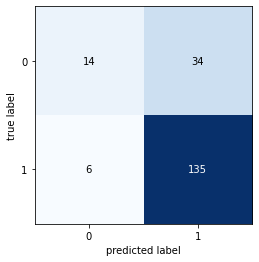

In [55]:
cm = confusion_matrix(y_test, y_predKNNP)

fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.savefig('graficos/KNNPriv.png')
plt.show()

### 4.2.7. Processo Gaussiano

In [56]:
y_predGPP, y_prevGPP = predictGP(fitGP(x_train, y_train), x_train, y_train, x_test)
print("[Processo Gaussiano] Score")
print(acc(y_test, y_predGPP))

[Processo Gaussiano] Selecionando kernel...
[Processo Gaussiano] Treinando modelo...
[Processo Gaussiano] Kernel escolhidos para Processo Gaussiano:  {'kernel': Matern(length_scale=1, nu=1.5)}
[Processo Gaussiano] Testando modelo...
[Processo Gaussiano] Score
78.83597883597884


In [57]:
print(classification_report(y_test, y_predGPP))

              precision    recall  f1-score   support

         0.0       0.75      0.25      0.38        48
         1.0       0.79      0.97      0.87       141

    accuracy                           0.79       189
   macro avg       0.77      0.61      0.62       189
weighted avg       0.78      0.79      0.75       189



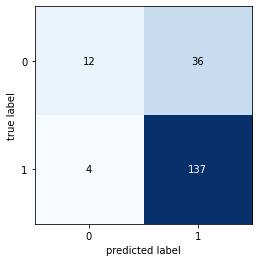

In [58]:
cm = confusion_matrix(y_test, y_predGPP)

fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.savefig('graficos/GPPriv.png')
plt.show()

# 5. Gráficos Comparativos

## 5.1. Comparativos dos Gráficos de Erro da Regressão Logística para as duas abordagens

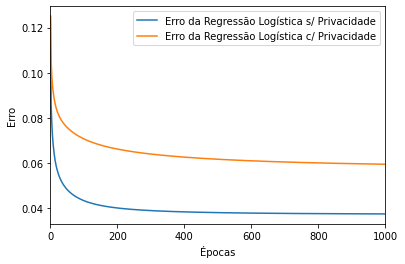

In [62]:
plt.plot(range(0, len(erroRL)), erroRL, label='Erro da Regressão Logística s/ Privacidade')
plt.plot(range(0, len(erroRLP)), erroRLP, label = 'Erro da Regressão Logística c/ Privacidade')
plt.legend()
plt.xlim(0,1000)
plt.xlabel('Épocas')
plt.ylabel('Erro')
plt.savefig('graficos/erros.png')

## 5.2. Curva ROC - Abordagem Não Privada

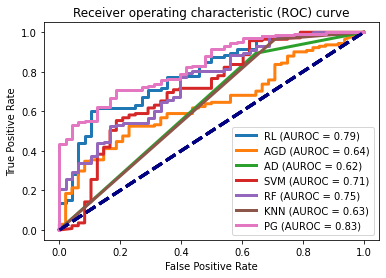

In [60]:
modelos = {'RL': y_prevRL, 'AGD': y_prevAGD, 'AD': y_prevAD, 'SVM': y_prevSVM, 'RF': y_prevRF, 'KNN': y_predKNN, 'PG': y_prevGP}
for modelo in modelos:
    fpr, tpr, thresholds = metrics.roc_curve(y_test, modelos[modelo])
    plt.plot(fpr, tpr, lw=3, label= modelo + " (AUROC = "+str(round(metrics.auc(fpr, tpr), 2))+")")
    plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
    plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.savefig('graficos/AUCNoPriv.png')

## 5.3. Curva ROC - Abordagem Privada

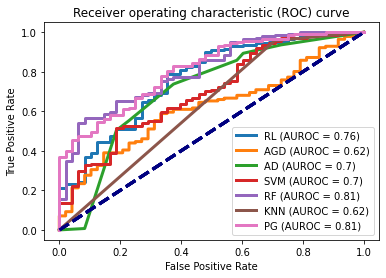

In [61]:
modelos = {'RL': y_prevRLP, 'AGD': y_prevAGDP, 'AD': y_prevADP, 'SVM': y_prevSVMP, 'RF': y_prevRFP, 'KNN': y_predKNNP, 'PG': y_prevGPP}
for modelo in modelos:
    fpr, tpr, thresholds = metrics.roc_curve(y_test, modelos[modelo])
    plt.plot(fpr, tpr, lw=3, label= modelo + " (AUROC = "+str(round(metrics.auc(fpr, tpr), 2))+")")
    plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
    plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.savefig('graficos/AUCPriv.png')